# 第13章 さまざまな予測性能評価

# 13.1 回帰の予測性能評価

**回帰モデルの評価指標**
* 平均2乗誤差(MSE = mean squared error) ... 差分の2乗の平均  
* 平均絶対誤差(MAE = mean absolute error) ... 差分の絶対値の平均  
 ※2乗しない分、平均絶対誤差のほうが直感的に理解しやすい  
 ※正解データに関する専門知識を使って判断する

* **2乗平均平方根誤差**(RMSE = root mean squared error) ... MSEの平方根を取ったもの  
 ※直感的に理解しやすい  
 ※外れ値の影響を受けやすい

使い分け
* RMSEとMAEの値の乖離が大きい → 外れ値への対処を検討する
* 全体的な誤差をできるだけ小さくしたい場合 → MAEを使う
* 大きな誤差をできるだけ少なくしたい場合 → RMSEを使う

**平均2乗誤差MSEを計算する**  
 * mean_squared_errorをインポートする  
  **from sklearn.metrics import mean_squared_error**
 * 計算する  
  **mean_squared_error(予測結果のデータ, 実際のデータ)**



**平均絶対誤差MAEを計算する**  
 * mean_absolute_errorをインポートする  
  **from sklearn.metrics import mean_absolute_error**
 * 計算する  
  **mean_absolute_error(予測結果のデータ, 実際のデータ)**



**2乗平均平方根誤差RMSEを計算する = MSEの平方根を計算する**  
 * mathをインポートする  
  **import math**
 * 計算する  
  **math.sqrt( MSEの値 )**



# 13.2 分類の予測性能評価

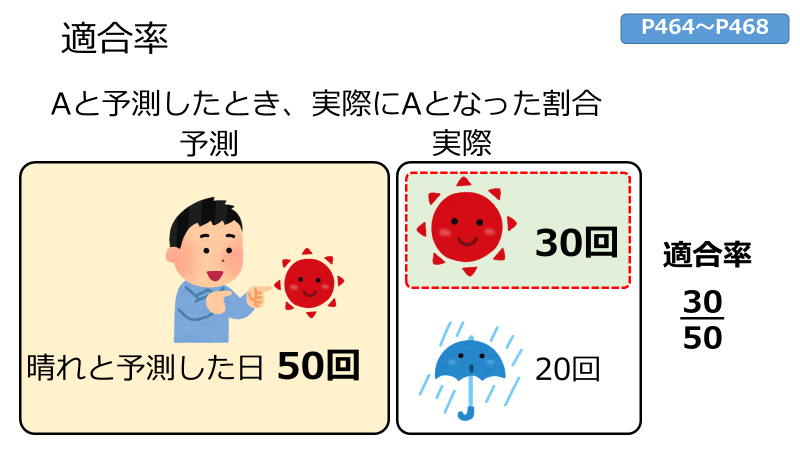

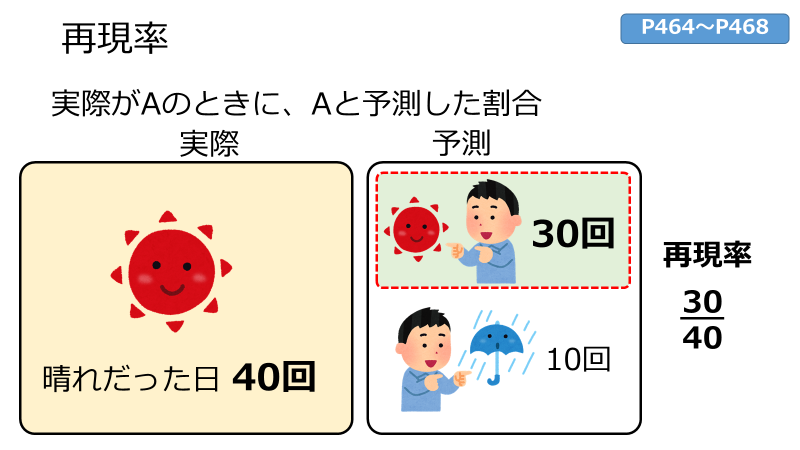

混同行列で確認する

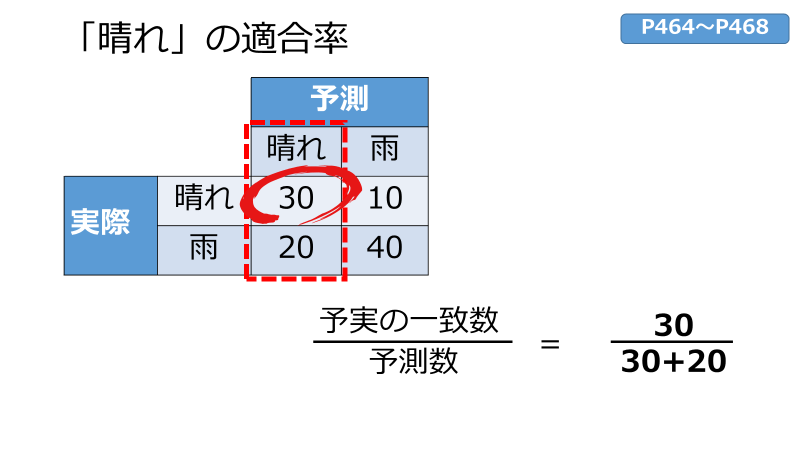

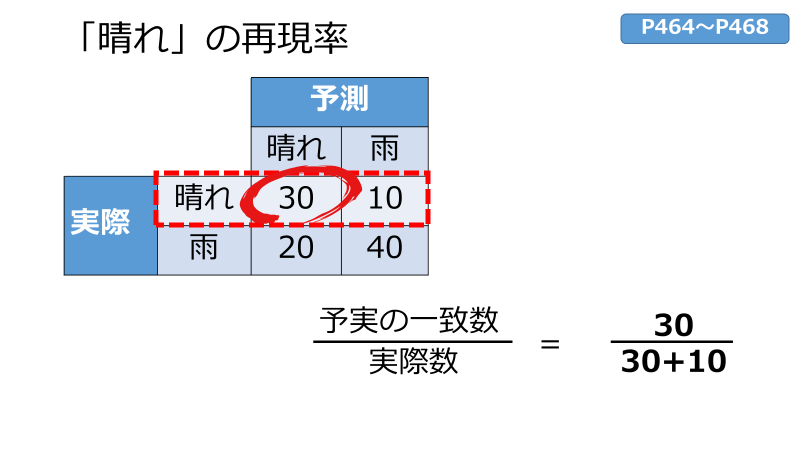

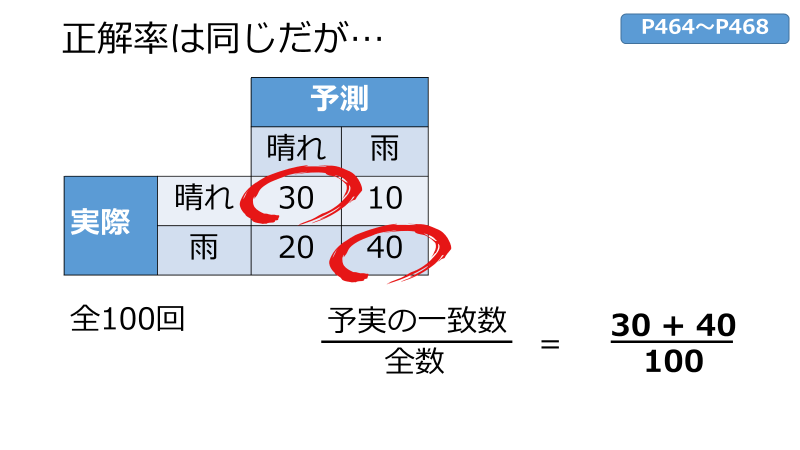

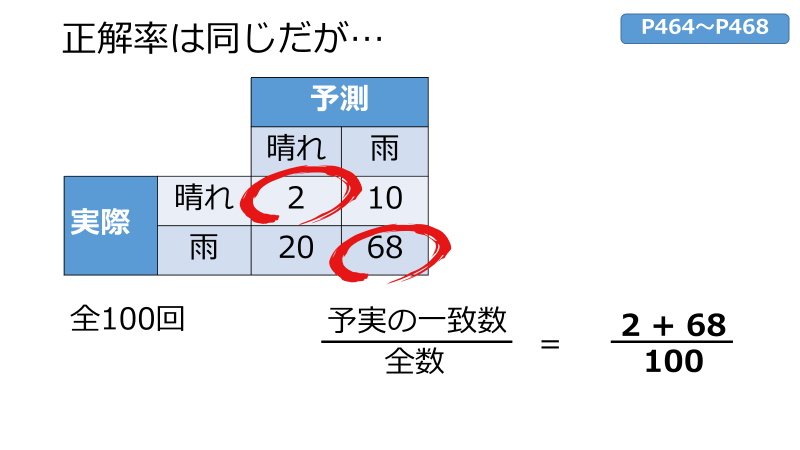

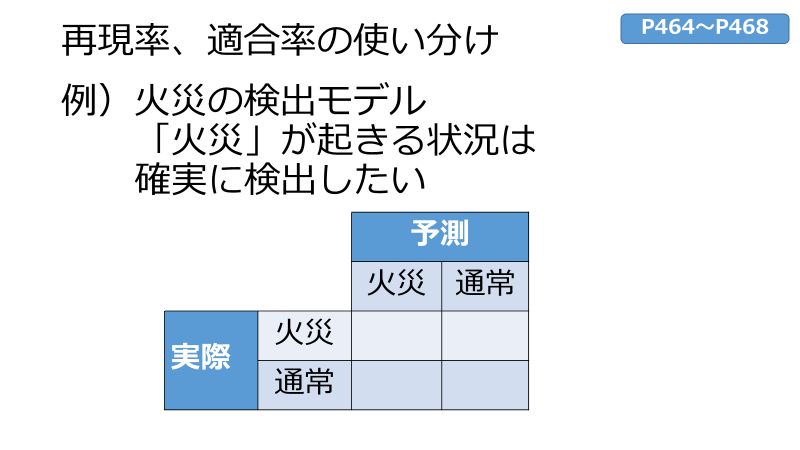

* 目的に応じて、何を重視するのかを考える
* 適合率と再現率のどちらも重視したい場合、**f1-score**を参考にする。  
 * f1-score ... 0～1(0性能が低い　～　1性能が高い)

**適合率、再現率、f1-scoreを確認する**
* classification_reportをインポートする  
 **from sklearn.metrics import classification_report**  
* 適合率、再現率、f1-scoreを取得する  
 **classification_report(y_pred=予測結果のデータ, y_true=実際のデータ,  output_dict=●)**
 * output_dict
  * True ... 出力結果を辞書型にする
  * False ... 出力結果をデフォルトのままにする(文字列型)

classification_reportの実行例  
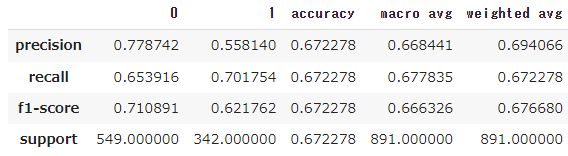

* precision ... 適合率  
* recall ... 再現率  
* f1-score ... F値 適合率と再現率の調和平均 (2×適合率×再現率) ÷ (適合率 + 再現率)
* support ... 正解データに含まれている個数

# 13.3 K分割交差検証

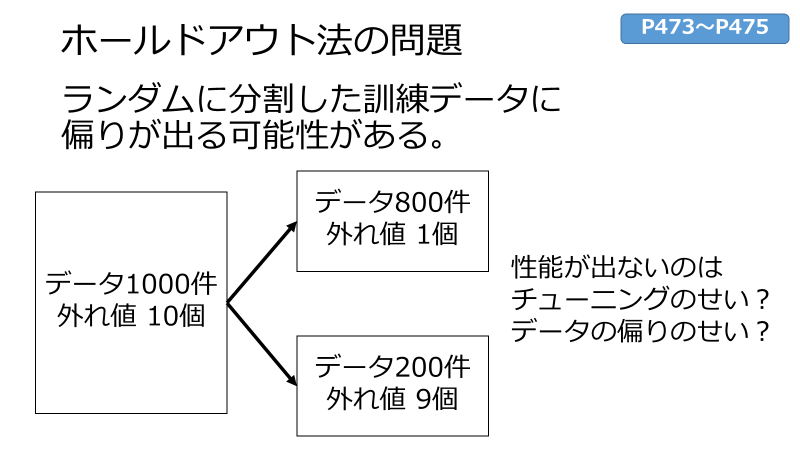

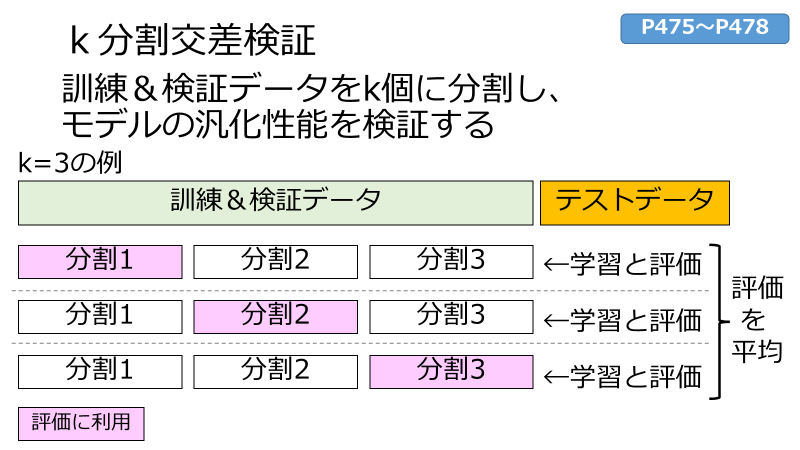

**K分割交差検証を行う**  
* KFoldをインポートする  
 **from sklearn.model_selection import KFold**

* KFoldのオブジェクトを作成する  
 **KFold(n_splits=●, shuffle=True, random_state=▲)**  
 * n_splits ... 分割数
 * shuffle ... ランダムに分割するためにTrueにしておく
 * random_state ... 乱数シード

* cross_validateをインポートする  
 **from sklearn.model_selection import cross_validate**

* 交差検証を行う  
 **cross_validate(検証するモデルのオブジェクト, 特徴量データ, 正解データ, cv=KFoldオブジェクト, scoring=●, return_train_score=True)**
 * scoring
  * **'r2'** ... 決定係数で検証する
  * **'accuracy'** ... 正解率で検証する
 * return_train_score    
   * True ... 訓練データでの結果を取得する(過学習の確認に使用できる)
   * False ... 訓練データでの結果を取得しない


分類モデルでK分割交差検証を行う場合、**各分割ブロックの正解データの比率を均等にするため**StratifiedKFoldを利用する

**StratifiedKFoldを行う**  
* StratifiedKFoldをインポートする  
 **from sklearn.model_selection import StratifiedKFold**  
* StrafitiedKFoldのオブジェクトを作成する  
 **StratifiedKFold**(n_splits=●, shuffle=True, random_state=▲)  
  KFoldと同様

K分割交差検証の結果を用いて、ハイパーパラメータの設定や前処理の内容をチューニングしていく  
**ハイパーパラメータ** ... モデルを準備するときに事前に設定する項目（学習で調整されない）

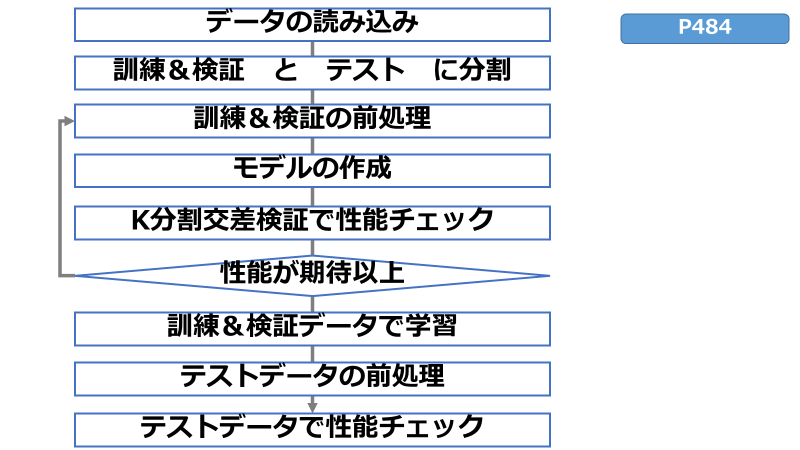